# Método de Euler:

In [2]:
%%writefile Euler.cpp

// Librerías y nombre de espacio:

#include <iostream>
#include <cmath>
using namespace std;

// Funciones a utilizar:

double f(double t, double x){
  return x/2;
}
void UnPasoEuler(double & t, double & x, double dt){
  /* El símbolo '&' indica un paso por referencia. Cualquier cambio que se haga con la variable, se guardará en la variable original, reescribiéndola aunque esté en una función externa. */
  /* Al definir la función como 'void', estoy diciendo que esta función no debe arrojarme o retornarme ningún valor; solamente me modifica los valores tal cual indican las instrucciones que le di */
  double dx;
  dx=dt*f(t,x);
  x+=dx; t+=dt;
}

// Programa principal:

int main(void){
  double t,x;
  double dt=0.1;

  for(t=0,x=1;t<10; ){
    cout<<t<<" "<<x<<endl;
    UnPasoEuler(t,x,dt);
  }
  return 0;
}

Writing Euler.cpp


In [3]:
!g++ Euler.cpp && ./a.out > datos.dat

Text(0.5, 1.0, 'Solución por método de Euler')

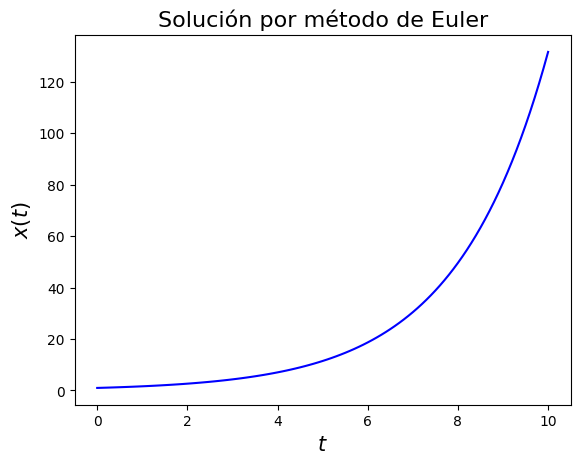

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

datos=pd.read_csv('./datos.dat',sep=' ',names=['x','y'])

plt.plot(datos['x'],datos["y"], "blue")
plt.xlabel("$t$",size=15)
plt.ylabel("$x(t)$",size=15)
plt.title("Solución por método de Euler",size=16)

Si solamente deseamos saber el último valor que toma la función en el intervalo (x_final), tendríamos entonces:

In [ ]:
%%writefile EulerFinal.cpp

// Librerías y nombre de espacio:

#include <iostream>
#include <cmath>
using namespace std;

// Funciones a utilizar:

double f(double t, double x){
  return x/2;
}
void UnPasoEuler(double & t, double & x, double dt){
  /* El símbolo '&' indica un paso por referencia. Cualquier cambio que se haga con la variable, se guardará en la variable original, reescribiéndola aunque esté en una función externa. */
  /* Al definir la función como 'void', estoy diciendo que esta función no debe arrojarme o retornarme ningún valor; solamente me modifica los valores tal cual indican las instrucciones que le di */
  double dx;
  dx=dt*f(t,x);
  x+=dx; t+=dt;
}

// Programa principal:

int main(void){
  double t,x;
  double dt=0.0001;   /* Aquí se requiere un dt más pequeño */

  for(t=0,x=1;t<10; ){
    UnPasoEuler(t,x,dt);
  }
  cout<<"x("<<t<<")_aprox="<<x<<endl;
  cout<<"x("<<t<<")_exacto="<<exp(t/2)<<endl;
  return 0;
}

Overwriting EulerFinal.cpp


In [ ]:
!g++ EulerFinal.cpp && ./a.out

x(10.0001)_aprox=148.402
x(10.0001)_exacto=148.421


# Método de Runge-Kutta:

In [14]:
%%writefile RK4.cpp

// Librerías y nombre de espacio:

#include <iostream>
#include <cmath>
using namespace std;

// Funciones a utilizar:

double f(double t, double x){
  return x/2;
}
void UnPasoRK4(double & t, double & x, double dt){
  double dx1, dx2, dx3, dx4;
  dx1=dt*f(t,x);
  dx2=dt*f(t+dt/2,x+dx1/2);
  dx3=dt*f(t+dt/2,x+dx2/2);
  dx4=dt*f(t+dt,x+dx3);
  x+=(dx1+2*(dx2+dx3)+dx4)/6; t+=dt;
}

// Programa principal:

int main(void){
  double t,x;
  double dt=0.5;

  for(t=0,x=1;t<10; ){
    cout<<t<<" "<<x<<endl;
    UnPasoRK4(t,x,dt);
  }
  return 0;
}

Overwriting RK4.cpp


In [15]:
!g++ RK4.cpp && ./a.out > datosRK.dat

Text(0.5, 1.0, 'Solución por método de RK4')

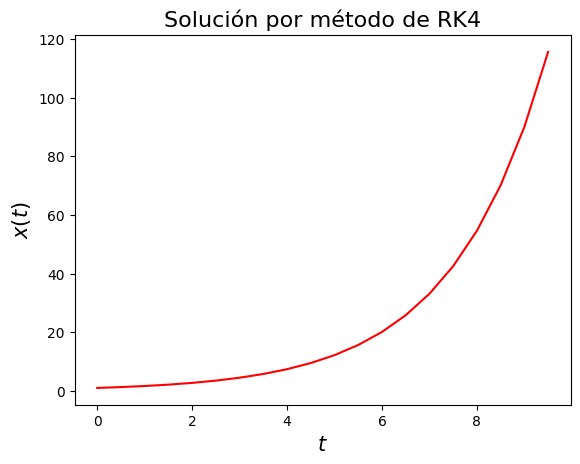

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

datos=pd.read_csv('./datosRK.dat',sep=' ',names=['x','y'])

plt.plot(datos['x'],datos["y"], "red")
plt.xlabel("$t$",size=15)
plt.ylabel("$x(t)$",size=15)
plt.title("Solución por método de RK4",size=16)

## Ecuaciones diferenciales acopladas:

In [37]:
%%writefile RK4_Acoplado.cpp

// Librerías, nombre de espacio y constantes:

#include <iostream>
#include <cmath>
using namespace std;

const double T=M_PI;
const double omega=2*M_PI/T;
const double omega2=omega*omega;

// Funciones a utilizar:

double f1(double t, double x1, double x2){
  return -omega2*x2;
}
double f2(double t, double x1, double x2){
  return x1;
}
void UnPasoRK4Acoplado(double & t, double & x1, double & x2, double dt){
  double dx1_1, dx1_2, dx1_3, dx1_4,            dx2_1, dx2_2, dx2_3, dx2_4;

  dx1_1=dt*f1(t,x1,x2);                         dx2_1=dt*f2(t,x1,x2);
  dx1_2=dt*f1(t+dt/2,x1+dx1_1/2,x2+dx2_1/2);    dx2_2=dt*f2(t+dt/2,x1+dx1_1/2,x2+dx2_1/2);
  dx1_3=dt*f1(t+dt/2,x1+dx1_2/2,x2+dx2_2/2);    dx2_3=dt*f2(t+dt/2,x1+dx1_2/2,x2+dx2_2/2);
  dx1_4=dt*f1(t+dt,x1+dx1_3,x2+dx2_3);          dx2_4=dt*f2(t+dt,x1+dx1_3,x2+dx2_3);

  x1+=(dx1_1+2*(dx1_2+dx1_3)+dx1_4)/6;          x2+=(dx2_1+2*(dx2_2+dx2_3)+dx2_4)/6; t+=dt;
}

// Programa principal:

int main(void){
  double t,x1,x2;
  double dt=0.1;

  for(t=0,x1=1,x2=0;t<10; ){
    cout<<t<<" "<<x1<<" "<<x2<<endl;
    UnPasoRK4Acoplado(t,x1,x2,dt);
  }
  return 0;
}

Overwriting RK4_Acoplado.cpp


In [38]:
!g++ RK4_Acoplado.cpp && ./a.out > datosRKAcoplado.dat

Text(0.5, 1.0, 'Solución por método de RK4 - Ecuaciones acopladas')

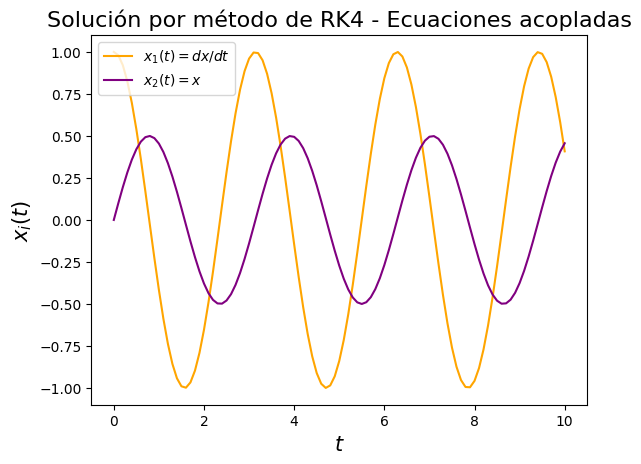

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

datos=pd.read_csv('./datosRKAcoplado.dat',sep=' ',names=['x','y','z'])

plt.plot(datos['x'],datos['y'], "orange", label='$x_1(t)=dx/dt$')
plt.plot(datos['x'],datos['z'], "purple", label='$x_2(t)=x$')
plt.xlabel("$t$",size=15)
plt.ylabel("$x_i(t)$",size=15)
plt.legend()
plt.title("Solución por método de RK4 - Ecuaciones acopladas",size=16)